Introducción
------------

¡Saludos, entusiastas de la inteligencia artificial! Hoy exploraremos el fascinante mundo de la creación de modelos de aprendizaje profundo con la poderosa biblioteca Fastai y la arquitectura ResNet18. No solo aprenderemos a construir un modelo, sino que también desglosaremos cada paso y discutiremos cómo podemos personalizar y expandir nuestro enfoque. ¡Comencemos!

Configuración del Entorno
-------------------------

Primero, asegurémonos de tener todo lo necesario para comenzar. Instalaremos Fastbook y sus dependencias y luego importaremos las bibliotecas necesarias.


In [1]:
# Instalamos las bibliotecas necesarias
!pip install fastbook > /dev/null 2>&1

In [2]:
# Importamos las bibliotecas necesarias
from fastbook import *
from fastai.vision.widgets import *

# Función para buscar imágenes en DuckDuckGo
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    
    # Utilizamos Fastbook para buscar imágenes en DuckDuckGo
    return L(search_images_ddg(term, max_images=max_images))

Búsqueda y Descarga de Imágenes
-------------------------------

Empezaremos buscando y descargando imágenes para nuestro modelo. Utilizaremos la función `search_images` de Fastbook para encontrar imágenes de pájaros y bosques.

In [3]:
# Buscamos imágenes de pájaros
urls = search_images('pajaro', max_images=1)

# Mostramos la primera URL de la lista
print(urls[0])

Searching for 'pajaro'
http://4.bp.blogspot.com/-BN9k5g7Hmcw/UfB8tU7z7iI/AAAAAAAAAGI/FFwKFrvC278/s1600/Diucon+casa+17.jpg


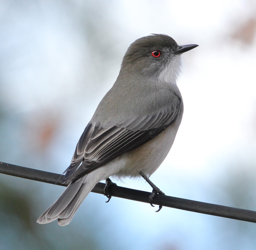

In [4]:
# Especificamos el destino de la descarga
dest = 'bird.jpg'

# Descargamos la imagen desde la primera URL de la lista
download_url(urls[0], dest, show_progress=False)

# Abrimos la imagen descargada utilizando PIL
im = Image.open(dest)

# Mostramos una versión reducida (thumbnail) de la imagen
im.to_thumb(256, 256)


### Explicación:

*   **`search_images`**: Esta función busca imágenes en DuckDuckGo y devuelve una lista de URLs. Puedes cambiar el término de búsqueda según tus necesidades.
    
*   **Descarga y Visualización**: Descargamos y mostramos la primera imagen de la lista de URLs.

Searching for 'forest photos'


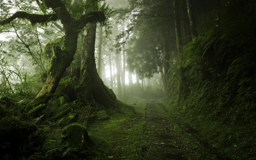

In [5]:
# Buscamos imágenes de bosques y descargamos la primera
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)

# Abrimos la imagen descargada utilizando PIL
forest_image = Image.open('forest.jpg')

# Mostramos una versión reducida (thumbnail) de la imagen
forest_image.to_thumb(256, 256)


Descarga de Imágenes Adicionales y Redimensionamiento
-----------------------------------------------------

Ahora, expandiremos nuestra base de datos descargando más imágenes para entrenar nuestro modelo. También redimensionaremos estas imágenes para asegurarnos de que tengan un tamaño uniforme.


In [6]:
# Definimos las búsquedas y la carpeta de destino
searches = 'forest', 'bird'
path = Path('bird_or_not')

# Iteramos sobre cada término de búsqueda
for o in searches:
    dest = (path/o)
    
    # Creamos la carpeta de destino si no existe
    dest.mkdir(exist_ok=True, parents=True)
    
    # Descargamos imágenes para cada término de búsqueda con diferentes modificadores
    download_images(dest, urls=search_images(f'{o} photo'))
   
    download_images(dest, urls=search_images(f'{o} sun photo'))
  
    download_images(dest, urls=search_images(f'{o} shade photo'))
  
    
    # Redimensionamos las imágenes descargadas
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


### Explicación:

*   **Búsqueda y Descarga Adicional**: Iteramos sobre términos de búsqueda adicionales y descargamos imágenes con diferentes modificadores.
    
*   **Redimensionamiento**: Garantizamos que todas las imágenes tengan un tamaño máximo de 400 píxeles.    

Verificación de la Integridad de las Imágenes
---------------------------------------------

Antes de entrenar nuestro modelo, verificaremos la integridad de las imágenes. Eliminaremos aquellas que puedan causar problemas.

In [7]:
# Verificamos la integridad de las imágenes descargadas
failed = verify_images(get_image_files(path))

# Eliminamos las imágenes defectuosas
failed.map(Path.unlink)

# Mostramos la cantidad de imágenes defectuosas
print(f"Se eliminaron {len(failed)} imágenes defectuosas.")

Se eliminaron 5 imágenes defectuosas.


### Explicación:

*   **`verify_images`**: Verificamos si hay imágenes defectuosas en nuestro conjunto de datos.
    
*   **Eliminación de Imágenes Defectuosas**: Eliminamos las imágenes defectuosas encontradas.    

Creación del Bloque de Datos y Entrenamiento del Modelo
-------------------------------------------------------

Con nuestros datos preparados, crearemos un bloque de datos y entrenaremos nuestro modelo utilizando la arquitectura ResNet18.

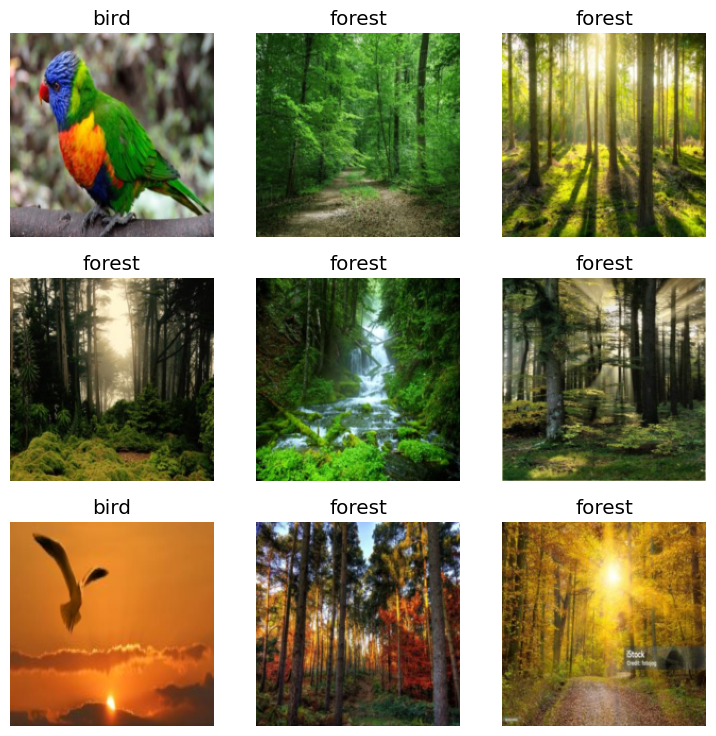

In [8]:
# Creamos un bloque de datos para cargar las imágenes
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

# Mostramos un lote de imágenes
dls.show_batch(max_n=9)

### Explicación:

*   **Bloque de Datos**: Creamos un bloque de datos para cargar y procesar nuestras imágenes.
    
*   **Modelo de Aprendizaje**: Utilizamos la arquitectura ResNet18 para crear un modelo de aprendizaje.
    
*   **Afinamiento del Modelo**: Afinamos el modelo durante 3 épocas.
    

Predicción con el Modelo Entrenado
----------------------------------

Finalmente, probaremos nuestro modelo haciendo una predicción sobre una imagen de pájaro.


In [9]:
# Creamos un modelo de aprendizaje utilizando resnet18
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Afinamos el modelo durante 3 épocas
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.862002,0.706802,0.181818,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.197789,0.209035,0.060606,00:14
1,0.104872,0.192689,0.060606,00:14
2,0.073426,0.130579,0.060606,00:15


In [10]:
# Realizamos la predicción utilizando el modelo entrenado
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))

# Mostramos el resultado de la predicción
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


### Explicación:

*   **Predicción**: Utilizamos nuestro modelo entrenado para hacer una predicción sobre una imagen específica.
    
*   **Resultados de la Predicción**: Mostramos el resultado de la predicción y la probabilidad asociada.


Conclusión
----------

¡Y ahí lo tienes! Hemos explorado desde la búsqueda de imágenes hasta la creación y entrenamiento de un modelo de aprendizaje profundo. Este es solo el comienzo; puedes personalizar y expandir cada sección según tus necesidades y explorar más a fondo con Fastai. ¡Espero que hayas disfrutado del viaje! No dudes en dejar comentarios si tienes preguntas o sugerencias. ¡Nos vemos!
